**Extract price data for a stock of your choice EITHER:**

1. Manually from Yahoo! Finance or Google Finance (via Google Sheets), for a 5-year timeframe, OR


2. Using an API (unfortunately, we can't name API providers due to copyright ambiguities.)


**Submitting Your Responses**

1. Upload the .py or .ipynb file on Google Drive


2. Right-click the file and select "Get Shareable Link"


3. Post the link.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
sns.set()

In [28]:
df = yf.download("MSFT", "2018-02-01", "2023-02-01")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-01,94.790001,96.070000,93.580002,94.260002,88.766060,47227900
2018-02-02,93.639999,93.970001,91.500000,91.779999,86.430580,47867800
2018-02-05,90.559998,93.239998,88.000000,88.000000,82.870918,51031500
2018-02-06,86.889999,91.480003,85.250000,91.330002,86.006828,67998600
2018-02-07,90.489998,91.769997,89.199997,89.610001,84.387054,41107600
...,...,...,...,...,...,...
2023-01-25,234.479996,243.300003,230.899994,240.610001,240.610001,66526600
2023-01-26,243.649994,248.309998,242.000000,248.000000,248.000000,33454500
2023-01-27,248.990005,249.830002,246.830002,248.160004,248.160004,26480800


In [29]:
# get the date and Adj Close prices on their own 
df.reset_index(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-01,94.790001,96.070000,93.580002,94.260002,88.766060,47227900
1,2018-02-02,93.639999,93.970001,91.500000,91.779999,86.430580,47867800
2,2018-02-05,90.559998,93.239998,88.000000,88.000000,82.870918,51031500
3,2018-02-06,86.889999,91.480003,85.250000,91.330002,86.006828,67998600
4,2018-02-07,90.489998,91.769997,89.199997,89.610001,84.387054,41107600
...,...,...,...,...,...,...,...
1253,2023-01-25,234.479996,243.300003,230.899994,240.610001,240.610001,66526600
1254,2023-01-26,243.649994,248.309998,242.000000,248.000000,248.000000,33454500
1255,2023-01-27,248.990005,249.830002,246.830002,248.160004,248.160004,26480800
1256,2023-01-30,244.509995,245.600006,242.199997,242.710007,242.710007,25867400


In [30]:
df = df[['Date', 'Adj Close']]
df.rename(columns={'Date' : 'date', 'Adj Close' : 'price_t'}, inplace=True)
df.head()

C:\Users\cassi\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,date,price_t
0,2018-02-01,88.766060
1,2018-02-02,86.430580
2,2018-02-05,82.870918
3,2018-02-06,86.006828
4,2018-02-07,84.387054


### 1. Compute daily returns for the stock for the entire sample duration.

In [31]:
# Shift the price_t column by 1 index to obtain price_t-1
df['price_t-1'] = df['price_t'].shift(1)

# Calculate returns using the pct_change() method
df['returns'] = df['price_t'].pct_change(1)

# our data
df

<ipython-input-31-0ac23a764019>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_t-1'] = df['price_t'].shift(1)
<ipython-input-31-0ac23a764019>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df['price_t'].pct_change(1)


,date,price_t,price_t-1,returns
0,2018-02-01,88.766060,NaN,NaN
1,2018-02-02,86.430580,88.766060,-0.026311
2,2018-02-05,82.870918,86.430580,-0.041185
3,2018-02-06,86.006828,82.870918,0.037841
4,2018-02-07,84.387054,86.006828,-0.018833
...,...,...,...,...
1253,2023-01-25,240.610001,242.039993,-0.005908
1254,2023-01-26,248.000000,240.610001,0.030714
1255,2023-01-27,248.160004,248.000000,0.000645
1256,2023-01-30,242.710007,248.160004,-0.021962


### 2. Plot the daily price of the stock and its daily returns in a line chart / graph. 

In [32]:
# Set the 'date' column as the index to help ensure dates show up in our plot.
df.set_index('date', inplace=True)
df.head()

,price_t,price_t-1,returns
date,,,
2018-02-01,88.766060,NaN,NaN
2018-02-02,86.430580,88.766060,-0.026311
2018-02-05,82.870918,86.430580,-0.041185
2018-02-06,86.006828,82.870918,0.037841
2018-02-07,84.387054,86.006828,-0.018833


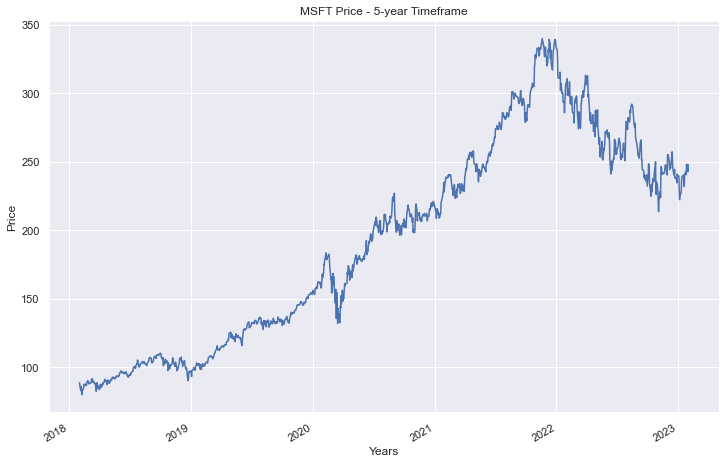

In [33]:
# Plot Facebook's Price data
df['price_t'].plot(figsize=(12, 8))
plt.title("MSFT Price - 5-year Timeframe")
plt.xlabel("Years")
plt.ylabel("Price")
plt.show();

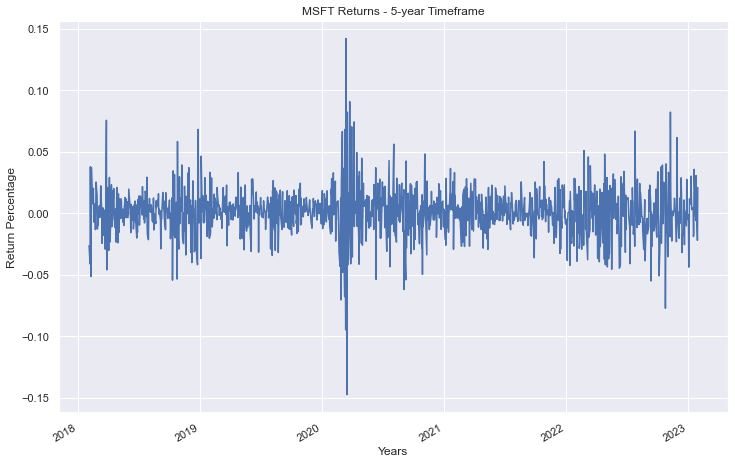

In [34]:
# Plot Facebook's Returns data
df['returns'].plot(figsize=(12, 8))
plt.title("MSFT Returns - 5-year Timeframe")
plt.xlabel("Years")
plt.ylabel("Return Percentage")
plt.show();